In [104]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
total =  pd.read_csv("email_table.csv")
opened = pd.read_csv("email_opened_table.csv")
clicked =  pd.read_csv("link_clicked_table.csv")

In [62]:
total.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [63]:
opened["open"] = 1

In [68]:
clicked["clicked"] = 1

In [69]:
opened.head()

,email_id,open
0,284534,1
1,609056,1
2,220820,1
3,905936,1
4,164034,1


In [70]:
total.shape

(100000, 7)

In [71]:
opened.shape

(10345, 2)

In [72]:
clicked.shape

(2119, 2)

In [73]:
result_1 =  pd.merge(total, opened, how="left", on=["email_id"])

In [74]:
result_1.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open
0,85120,short_email,personalized,2,Sunday,US,5,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,NaN
3,493711,short_email,generic,6,Monday,UK,1,NaN
4,106887,long_email,generic,14,Monday,US,6,NaN


In [75]:
result_1["open"].fillna(0, inplace=True)

In [76]:
result_1.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open
0,85120,short_email,personalized,2,Sunday,US,5,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0


In [79]:
data =   pd.merge(result_1, clicked, how="left", on=["email_id"])

In [80]:
result.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0.0,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0,NaN
3,493711,short_email,generic,6,Monday,UK,1,0.0,NaN
4,106887,long_email,generic,14,Monday,US,6,0.0,NaN


In [97]:
data["clicked"].fillna(0, inplace=True)

In [98]:
data.tail(15)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,clicked
99985,883985,long_email,generic,2,Wednesday,US,3,0.0,0.0
99986,597854,long_email,personalized,7,Sunday,US,7,0.0,0.0
99987,634135,short_email,generic,14,Monday,UK,2,0.0,0.0
99988,856718,short_email,personalized,1,Sunday,US,2,0.0,0.0
99989,495740,short_email,personalized,14,Friday,US,3,0.0,0.0
99990,952440,long_email,personalized,9,Friday,US,4,0.0,0.0
99991,774096,long_email,generic,11,Sunday,UK,2,0.0,0.0
99992,873013,long_email,generic,11,Sunday,US,3,0.0,0.0
99993,299898,long_email,generic,8,Saturday,US,0,0.0,0.0
99994,506337,short_email,generic,8,Wednesday,FR,2,0.0,0.0


In [99]:
data["open"].value_counts(normalize=True)

open
0.0    0.89655
1.0    0.10345
Name: proportion, dtype: float64

In [102]:
data["clicked"].value_counts(normalize=True)

clicked
0.0    0.97881
1.0    0.02119
Name: proportion, dtype: float64

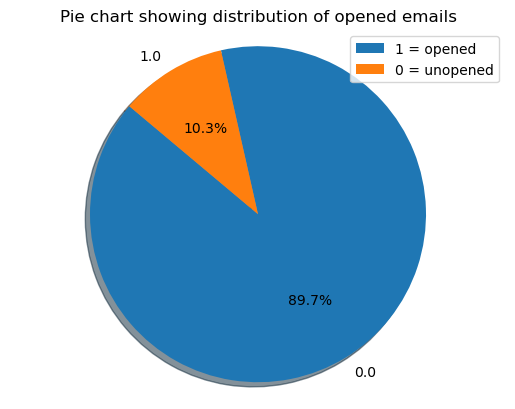

In [120]:
sizes = data["open"].value_counts()
# Plot
plt.pie(sizes.values, labels=sizes.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Pie chart showing distribution of opened emails")
plt.axis('equal')
plt.legend(["1 = opened","0 = unopened"])
plt.show()

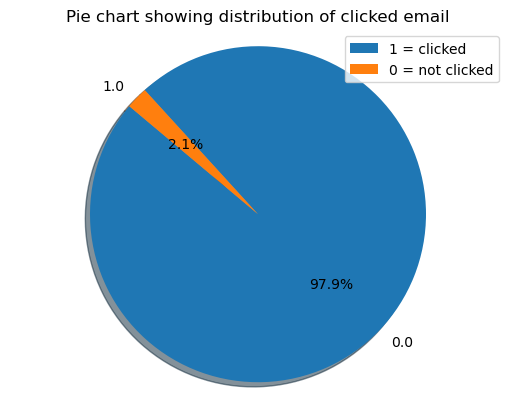

In [121]:
sizes = data["clicked"].value_counts()
# Plot
plt.pie(sizes.values, labels=sizes.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Pie chart showing distribution of clicked email")
plt.axis('equal')
plt.legend(["1 = clicked","0 = not clicked"])
plt.show()

In [124]:
data_1["clicked"].value_counts()


clicked
0.0    8276
1.0    2069
Name: count, dtype: int64

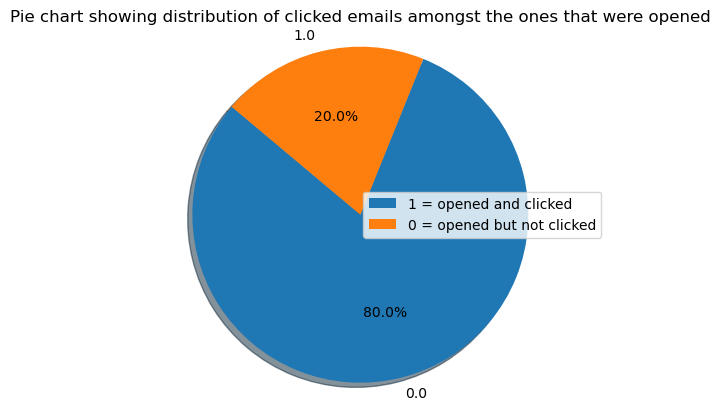

In [129]:
data_1 = data[data["open"]==1]
sizes =  data_1["clicked"].value_counts()
# Plot
plt.pie(sizes.values, labels=sizes.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Pie chart showing distribution of clicked emails amongst the ones that were opened")
plt.axis('equal')
plt.legend(["1 = opened and clicked","0 = opened but not clicked"])
plt.show()

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   email_id             100000 non-null  int64  
 1   email_text           100000 non-null  object 
 2   email_version        100000 non-null  object 
 3   hour                 100000 non-null  int64  
 4   weekday              100000 non-null  object 
 5   user_country         100000 non-null  object 
 6   user_past_purchases  100000 non-null  int64  
 7   open                 100000 non-null  float64
 8   clicked              100000 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [131]:
data['user_country'].value_counts()

user_country
US    60099
UK    19939
FR     9995
ES     9967
Name: count, dtype: int64

In [142]:
data_2 = data[data['clicked']==1]

In [144]:
data_2[data_2['open']==0].shape

(50, 9)

In [151]:
data[data['clicked']==1][data[data['clicked']==1]['open']==0].index

Index([ 3156,  3527,  5724,  7202, 10660, 11255, 13104, 15537, 16440, 17535,
       20008, 21283, 25464, 28881, 29165, 32770, 37313, 39785, 42829, 44485,
       47833, 48464, 53180, 53991, 55883, 56454, 58509, 58822, 60817, 65559,
       69042, 69405, 70878, 71271, 71779, 72770, 73523, 76795, 79191, 83417,
       83454, 87481, 87500, 88677, 90662, 92703, 94073, 94333, 95005, 95167],
      dtype='int64')

In [153]:
data.drop(index= (i for i in (data[data['clicked']==1][data[data['clicked']==1]['open']==0].index)), inplace=True)

In [154]:
data[data['clicked']==1][data[data['clicked']==1]['open']==0].index

Index([], dtype='int64')

In [157]:
data[data['clicked']==1]['open'].value_counts()

open
1.0    2069
Name: count, dtype: int64

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99950 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   email_id             99950 non-null  int64  
 1   email_text           99950 non-null  object 
 2   email_version        99950 non-null  object 
 3   hour                 99950 non-null  int64  
 4   weekday              99950 non-null  object 
 5   user_country         99950 non-null  object 
 6   user_past_purchases  99950 non-null  int64  
 7   open                 99950 non-null  float64
 8   clicked              99950 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 7.6+ MB
